# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [59]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    niter = 0
    x = x0
    for niter in range(maxiter+1):
        if abs(f(x)/fder(x)) < eps:
            break
        x = x - f(x)/fder(x)
        niter +=1  
    return(x, niter)

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [60]:
def test(x):
    return x**2 - 1
def test_der(x):
    return 2*x

print(newton_iteration(test,test_der,10))
print(newton_iteration(test,test_der,-10))

(1.0000052895642693, 6)
(-1.0000052895642693, 6)


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

# Part II. Fixed-point iteration

In [61]:
def newton_iteration_mod(f, fder, x0, m, eps=1e-5, maxiter=1000):
    niter = 0
    x = x0
    for niter in range(maxiter+1):
        if abs(m*f(x)/fder(x)) < eps:
            break
        x = x - m*f(x)/fder(x) 
        niter += 1
    return(x, niter)
def test2(x):
    return (x**2-1)**2
def test_der2(x):
    return 4*x*(x**2-1)
print(newton_iteration_mod(test2,test_der2,10,1), newton_iteration_mod(test2,test_der2,10,2), newton_iteration_mod(test2,test_der2,10,1), newton_iteration_mod(test2,test_der2,10,3), newton_iteration_mod(test2,test_der2,10,4), newton_iteration_mod(test2,test_der2,10,5))

(1.0000157327144432, 23) (1.0000052895642693, 6) (1.0000157327144432, 23) (0.9999957769059634, 16) (0.09999999999999964, 1001) (2.148980765643676, 1001)


We can see that when we choose equal to the multiplicity of the root, we see that rate of convergence become quadratic again. It is a consequence of Tailor series, where first m members go down to zeros, and multiplying it on $m$, fix troubles with factorial.

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

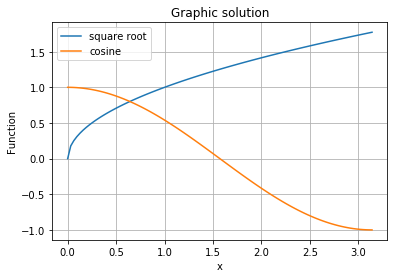

Fist check: (0.6416445760066882, 10)
Second check: (10, 0) 0
Second check: (0.6424628850970971, 90) 0.1
Second check: (0.6421139154509563, 45) 0.2
Second check: (0.6418985270042175, 30) 0.30000000000000004
Second check: (0.6419008984189127, 21) 0.4
Second check: (0.6418313523079222, 16) 0.5
Second check: (0.6418436232630007, 12) 0.6
Second check: (0.6417329256088886, 10) 0.7
Second check: (0.6416344606311296, 7) 0.7999999999999999
Second check: (0.6417269081605964, 8) 0.8999999999999999
Second check: (0.6416445760066882, 10) 0.9999999999999999
Second check: (0.6417602950995426, 11) 1.0999999999999999
Second check: (nan, 1001) 1.2
Second check: (nan, 1001) 1.3
Second check: (0.6416700066621915, 29) 1.4000000000000001
Third check with special alpha: (0.6417199598992948, 7)


In [70]:
import matplotlib.pyplot as plt #graphical solution of our problem
import numpy as np
x = np.linspace(0, np.pi, 100)
u = np.sqrt(x)
v = np.cos(x)
plt.figure
plt.plot(x, u, label='square root')
plt.plot(x, v, label='cosine')
plt.grid(True)
plt.xlabel(u'x')
plt.ylabel(u'Function')
plt.title(u'Graphic solution')
plt.legend()
plt.show()

def fix_iter(f, x0, eps = 1e-4, maxiter=1000):
    x = x0
    niter = 0 
    for niter in range(maxiter+1):
        if abs(f(x)) < eps:
            break
        x = x - f(x)
        niter +=1
    return x, niter

def prob(x):
    return np.sqrt(x) - np.cos(x)

print('Fist check:',fix_iter(prob, 10)) #we can see that our solution is very close to graphic one

def fix_iter_mod(f, x0, alpha, eps = 1e-4, maxiter=1000):
    x = x0
    niter = 0 
    for niter in range(maxiter+1):
        if abs(alpha*f(x)) < eps:
            break
        x = x - alpha*f(x)
        niter +=1
    return x, niter
i = 0
while i < 1.5:
    print('Second check:',fix_iter_mod(prob, 10, i),i)
    i += 0.1

print('Third check with special alpha:', fix_iter_mod(prob, 10, 2/(1/np.sqrt(2)+np.sin(1/2)+1/2/np.sqrt(0.7)+np.sin(0.7)))) # here I choose the localization interval = (0.5, 0.7) and m, M, like an inf and sup of f'(x), and its really the least number of iterations


# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

In [63]:
def newton_iteration_сo(f, fder, x0, eps=1e-5, maxiter=1000):
    niter = 0
    x = x0
    for niter in range(maxiter+1):
        if abs(f(x)/fder(x)) < eps:
            break
        x = x - f(x)/fder(x)
        niter +=1  
    return(x, niter)

In [64]:

import cmath as cm
def c_pol(x):
    return x**3 -1
def c_pol_der(x):
    return 3*x**2
x1,i = newton_iteration_сo(c_pol,c_pol_der, complex(-1,14))
print(x1)


(-0.499999525460057+0.8660258793031638j)


0.0


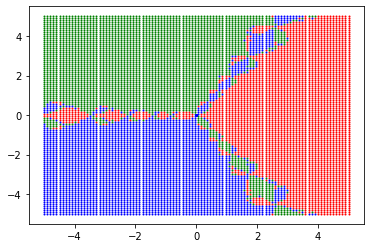

In [77]:
import seaborn as sns
root1 = 1 
root2 = np.exp(2*np.pi*1j/3)
root3 = np.exp(4*np.pi*1j/3)
initialReal=np.linspace(-5,5,100)
initialImag=np.linspace(-5,5,100)

XR,YR=np.meshgrid(initialReal,initialImag)
initial=XR+1j*YR
r1 = np.zeros_like(initial)
r2 = np.zeros_like(initial)
r3 = np.zeros_like(initial)
new_initial=np.zeros_like(initial)
for i in range(initial.shape[0]):
    for j in range(initial.shape[1]):
        new_initial[i,j] = newton_iteration_сo(c_pol,c_pol_der,initial[i,j])[0]
for i in range(new_initial.shape[0]):
    for j in range(new_initial.shape[1]):
        if abs(new_initial[i,j].real - root1.real)<1e-2 and abs(new_initial[i,j].imag - root1.imag)<1e-2:
            r1[i,j] = initial[i,j]
        if abs(new_initial[i,j].real - root2.real)<1e-2 and abs(new_initial[i,j].imag - root2.imag)<1e-2:
            r2[i,j] = initial[i,j]
        if abs(new_initial[i,j].real - root3.real)<1e-2 and abs(new_initial[i,j].imag - root3.imag)<1e-2:
            r3[i,j] = initial[i,j]
r1_r, r1_i = r1.real, r1.imag
r2_r, r2_i = r2.real, r2.imag
r3_r, r3_i = r3.real, r3.imag
plt.figure
plt.plot(r1_r, r1_i, color="r", marker="o", markersize = 1 , linestyle="none")
plt.plot(r2_r, r2_i, color="g", marker="o", markersize = 1 , linestyle="none")
plt.plot(r3_r, r3_i, color="b", marker="o", markersize = 1 ,linestyle="none")
plt.show()


